In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns; sns.set()

## Fase: Obtencion de datos
* Datos reales de los alumnos de la FISI-B18

In [2]:
data=pd.read_csv(r"C:\Users\JOHAN\Desktop\2020-II\HOJA_1_CALIFICACIONES.csv",sep=";",index_col='No.')

In [3]:
data.head()

,Codigo,Apellidos y Nobres,Escuela,Plan Estudio,Edad,Sexo,No.cur-rep,No.asig-mat,No.cred.Mat,Prom.pond,Cred.faltante,Total.Cred,Cred.Llevad
No.,,,,,,,,,,,,,
1,18200129,Acuña Anampa Britney Jennifer,Sistemas,2018,20,F,0,7,22,13.728,99,213,114
2,18200002,"Alonso Varillas, Margorie Margarita",Sistemas,2018,21,F,2,7,22,14.211,99,213,114
3,18200055,Altamirano Alca Fernando,Sistemas,2018,20,M,0,7,22,14.904,99,213,114
4,18200057,Avila Velasquez Luis Enrique,Sistemas,2018,22,M,0,7,22,14.351,99,213,114
5,18200008,"Cacho Leon, César Francisco",Sistemas,2018,19,M,3,7,22,12.435,102,213,111


## Fase 2: Exploracion de datos
* Observar el tipo de variables de las que estan compuestas
* Detectar la presencia de caracteristicas categoricas
* Detectar la distribucion de variables continuas
* Detectar valores faltantes
* Detectar valores atipicos y duplicados

In [4]:
#observar la informacion del dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40 entries, 1 to 40
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Codigo              40 non-null     int64  
 1   Apellidos y Nobres  40 non-null     object 
 2   Escuela             40 non-null     object 
 3   Plan Estudio        40 non-null     int64  
 4   Edad                40 non-null     int64  
 5   Sexo                40 non-null     object 
 6   No.cur-rep          40 non-null     int64  
 7   No.asig-mat         40 non-null     int64  
 8   No.cred.Mat         40 non-null     int64  
 9   Prom.pond           40 non-null     float64
 10  Cred.faltante       40 non-null     int64  
 11  Total.Cred          40 non-null     int64  
 12  Cred.Llevad         40 non-null     int64  
dtypes: float64(1), int64(9), object(3)
memory usage: 4.4+ KB


In [5]:
#observamos los valores faltantes
data.isnull().sum()

Codigo                0
Apellidos y Nobres    0
Escuela               0
Plan Estudio          0
Edad                  0
Sexo                  0
No.cur-rep            0
No.asig-mat           0
No.cred.Mat           0
Prom.pond             0
Cred.faltante         0
Total.Cred            0
Cred.Llevad           0
dtype: int64

In [6]:
#detectar que columnas tienes valores continuos
columnas_continuas=[col for col in data.columns if data[col].dtype in ('int64','float64')]
columnas_texto= [col for col in data.columns if data[col].dtype =='object']

In [7]:
print("Columnas con valores continuos")
print("\n".join(columnas_continuas))

Columnas con valores continuos
Codigo
Plan Estudio
Edad
No.cur-rep
No.asig-mat
No.cred.Mat
Prom.pond
Cred.faltante
Total.Cred
Cred.Llevad


In [8]:
print("Columnas con valores de texto")
print("\n".join(columnas_texto))

Columnas con valores de texto
Apellidos y Nobres
Escuela
Sexo


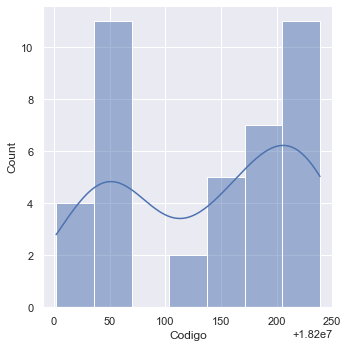

C:\Users\JOHAN\anaconda3\envs\mlearning\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


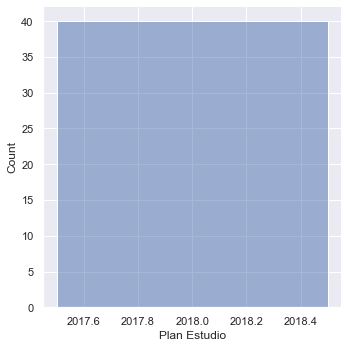

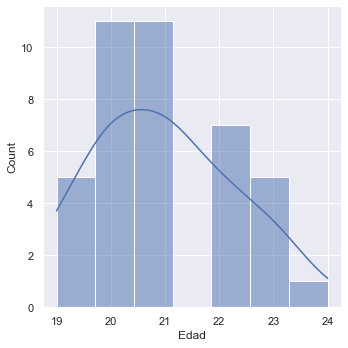

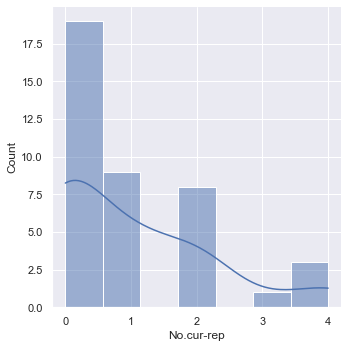

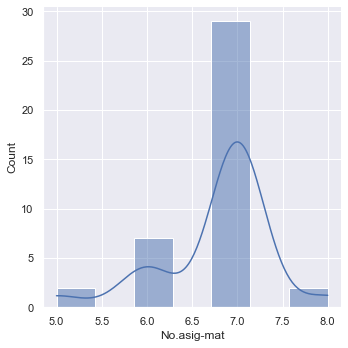

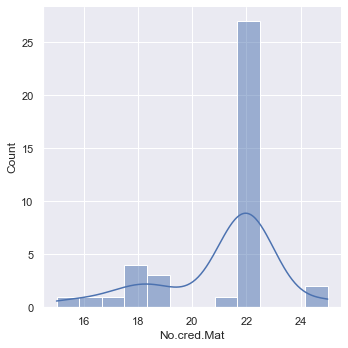

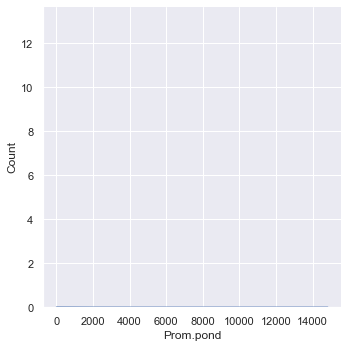

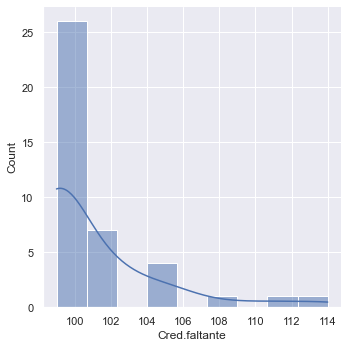

C:\Users\JOHAN\anaconda3\envs\mlearning\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


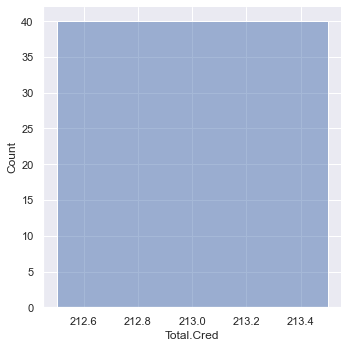

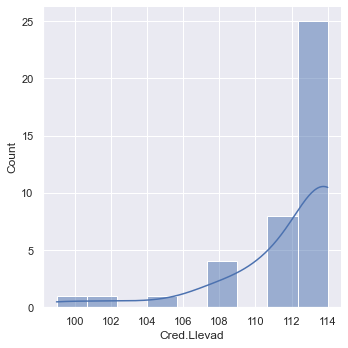

In [9]:
for col in columnas_continuas:
    sns.displot(data[col],kde=True)
    plt.show()

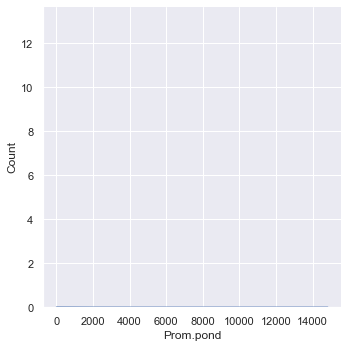

In [10]:
sns.displot(data['Prom.pond'],kde=True)

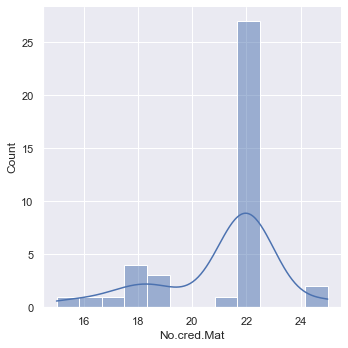

In [11]:
sns.displot(data['No.cred.Mat'],kde=True)

In [12]:
for col in columnas_texto:
    serie=data[col].value_counts()
    print("-----------{0}-------------".format(col))
    print(serie)

-----------Apellidos y Nobres-------------
Sánchez Muñoz, José Anderson                 1
De La Cruz Guerra, Franklin Alonso           1
Alonso Varillas, Margorie Margarita          1
Cacho Leon, César Francisco                  1
Fernández Palomino, Dair Anthony             1
Tonconi Laura Daniel William                 1
Avila Velasquez Luis Enrique                 1
Céspedes Francia, Gianfranco Moisés          1
Collantes Tito, Miguel Angel                 1
Motta Kobayashi Gabriela Estrella            1
Solier Cosser, Ericka Anabel                 1
Gonzales Aburto Ricardo Daniel               1
Zapata Barreto Daniel Santos                 1
Torres Meza, Alejandro Sebastian             1
Castillo Cornejo, Jeffrey Bryan              1
Torres Ortega, Joaquin Joseph                1
Valenzuela Segovia Luis Alejandro Gabriel    1
Toribio Barrueta, Miguel Alexis              1
Cuadros Carrasco Jesus Alfonso               1
Huaysara Jauregui Alvaro                     1
Vera Leon, Bryan 

In [13]:
pd.value_counts

<function pandas.core.algorithms.value_counts(values, sort: 'bool' = True, ascending: 'bool' = False, normalize: 'bool' = False, bins=None, dropna: 'bool' = True) -> 'Series'>

In [14]:
data[data.duplicated()]

,Codigo,Apellidos y Nobres,Escuela,Plan Estudio,Edad,Sexo,No.cur-rep,No.asig-mat,No.cred.Mat,Prom.pond,Cred.faltante,Total.Cred,Cred.Llevad
No.,,,,,,,,,,,,,


In [15]:
corr=data[columnas_continuas].corr(method='pearson')

<AxesSubplot:>

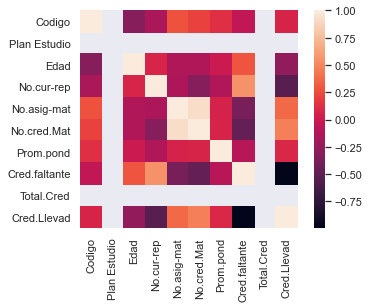

In [16]:
sns.heatmap(corr,fmt='0.2f',square=True)

## Preparacion de datos

In [17]:
#codificamos las columna de Sexo
from sklearn.preprocessing import LabelEncoder

encoder=LabelEncoder()
data['Sexo']=encoder.fit_transform(data['Sexo'])

In [18]:
encoder.classes_

array(['F', 'M'], dtype=object)

In [19]:
data.head(2)

,Codigo,Apellidos y Nobres,Escuela,Plan Estudio,Edad,Sexo,No.cur-rep,No.asig-mat,No.cred.Mat,Prom.pond,Cred.faltante,Total.Cred,Cred.Llevad
No.,,,,,,,,,,,,,
1,18200129,Acuña Anampa Britney Jennifer,Sistemas,2018,20,0,0,7,22,13.728,99,213,114
2,18200002,"Alonso Varillas, Margorie Margarita",Sistemas,2018,21,0,2,7,22,14.211,99,213,114


In [20]:
#eliminamos la columna codigo, nombres y escuela
data_filter=data.drop(['Codigo','Apellidos y Nobres','Plan Estudio','Escuela'],axis=1)

In [21]:
data_filter.head(2)

,Edad,Sexo,No.cur-rep,No.asig-mat,No.cred.Mat,Prom.pond,Cred.faltante,Total.Cred,Cred.Llevad
No.,,,,,,,,,
1,20,0,0,7,22,13.728,99,213,114
2,21,0,2,7,22,14.211,99,213,114


In [22]:
np.unique(data['Plan Estudio'])

array([2018], dtype=int64)

In [23]:
#separamos las variables objetivos de las demas columnas
X=data_filter.drop('Prom.pond',axis=1).values
y=data_filter['Prom.pond'].values
#procedemos a dividor los datos en sets de entrenamiento y validacion
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42,shuffle=True)

In [24]:
#Escalamos los datos
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [25]:
scaler.fit(x_train);
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

In [26]:
x_train[:5]

array([[0.4       , 1.        , 0.25      , 0.66666667, 0.7       ,
        0.        , 0.        , 1.        ],
       [0.4       , 1.        , 0.        , 0.66666667, 0.7       ,
        0.        , 0.        , 1.        ],
       [0.2       , 1.        , 1.        , 0.66666667, 0.2       ,
        0.2       , 0.        , 0.8       ],
       [0.4       , 1.        , 0.        , 0.66666667, 0.7       ,
        0.        , 0.        , 1.        ],
       [0.2       , 1.        , 0.        , 0.66666667, 0.7       ,
        0.        , 0.        , 1.        ]])

## Seleccion del modelo

In [27]:
from sklearn.ensemble import RandomForestRegressor

In [28]:
forest=RandomForestRegressor(n_estimators=500,max_depth=10)

In [29]:
forest.fit(x_train,y_train)

RandomForestRegressor(max_depth=10, n_estimators=500)

In [30]:
forest.score(x_test,y_test)

-5532234.51017816

In [31]:
y_pred=forest.predict(x_test)

In [32]:
y_pred

array([  13.70488117,   13.70488117, 3895.29331734,   48.15716818,
         13.56739818,  184.77106263,   13.92167817,   13.8533    ,
         48.30216029,   48.28765979,   13.5649629 , 3895.29331734])

In [35]:
y_test

array([13.645, 13.125, 15.061, 14.211, 12.435, 13.45 , 13.417, 13.8  ,
       13.974, 14.719, 13.422, 14.061])

In [43]:
#ahora comparamos los resultados obtenidos delas predicciones
def plot_compare(y_origin,y_after):
    n_datos=range(1,len(y_origin)+1)
    plt.plot(n_datos,y_origin,'bo-',label='Ytest')
    plt.plot(n_datos,y_after,'ro-',label='Ypred')
    plt.xlabel("Numero datos de prueba")
    plt.ylabel("Promedios ponderados")
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

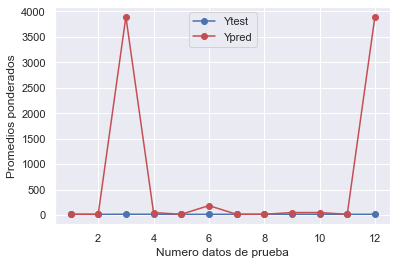

In [44]:
plot_compare(y_test,y_pred)

In [45]:
import joblib

joblib.dump(forest,"modelo_regression_estimarPonderado.pkl")

['modelo_regression_estimarPonderado.pkl']

In [42]:
len(y_pred)

12